In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import statistics

### Упражнение 1(4)

In [2]:
# Генерируем выборку X
#X = np.random.uniform(-1,1,1000) (вариант без random.seed())
seed = 13
rand = np.random.RandomState(seed)
X = rand.uniform(-1,1,1000)
Y = X**2
print("Коэф. корр. Пирсона:", stats.pearsonr(X, Y))
print("Коэф. корр. Спирмена:", stats.spearmanr(X, Y))

Коэф. корр. Пирсона: (-0.014417796588827556, 0.6488328687528161)
Коэф. корр. Спирмена: SpearmanrResult(correlation=-0.04756407556407556, pvalue=0.1328190163682535)


### Упражнение 3.1
В файле lifeline.xls содержатся 50 пар наблюдений из исследования докторов Л. Матера и М. Уилсона. В нем рассматривались следующие переменные: X — длина «линии жизни» на левой руке
в сантиметрах (с точностью до 0.15 см) и Y — продолжительность жизни
человека (округленная до ближайшего целого года). Изучите корреляцию X
и Y . Верно ли, что X и Y связаны линейной регрессионной зависимостью?

In [3]:
df = pd.read_excel('lifeline.xls') 
df.T

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
X,9.75,9.0,9.6,9.75,11.25,9.45,11.25,9.0,7.95,12.0,...,8.85,9.0,9.75,10.65,13.2,7.95,7.95,9.15,9.75,9.0
Y,19.00,40.0,42.0,42.00,47.00,49.00,50.00,54.0,56.00,56.0,...,77.00,80.0,82.00,82.00,82.0,83.00,86.00,88.00,88.00,94.0


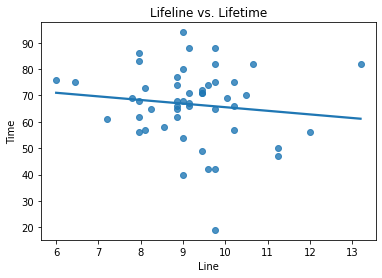

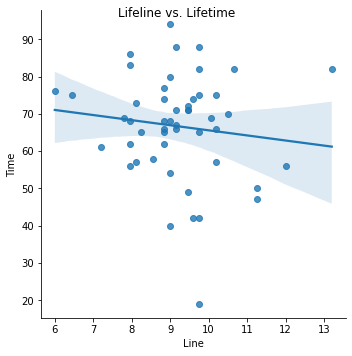

In [4]:
import seaborn as sb
import seaborn as sns

ax = sb.regplot(x = "X", y = "Y", ci = None, data = df)
ax.set_title("Lifeline vs. Lifetime")
ax.set_xlabel("Line")
ax.set_ylabel("Time")

ax = sns.lmplot(x="X", y="Y", data=df)
ax.fig.suptitle("Lifeline vs. Lifetime",fontsize = 12)
ax.set_axis_labels(x_var="Line", y_var="Time")

In [5]:
print("Коэф. корр. Пирсона:", stats.pearsonr(df['X'], df['Y']))
print("Коэф. корр. Спирмена:", stats.spearmanr(df['X'], df['Y']))

Коэф. корр. Пирсона: (-0.12255365085952198, 0.3965106928959566)
Коэф. корр. Спирмена: SpearmanrResult(correlation=-0.08601349137019551, pvalue=0.5525613938198386)


#### X и Y не связаны линейной регрессионной зависимостью

### Упражнение 3.2 

In [6]:
import math
seed = 13
rand = np.random.RandomState(seed)
X = rand.normal(0,1,(100,1000)) + math.exp(1)
X.shape

(100, 1000)

In [7]:
Y1 = np.apply_along_axis(lambda x: x**2 + 0.1 * rand.normal(), 1, X)
Y1.shape

(100, 1000)

In [8]:
Y2 = np.apply_along_axis(lambda x: abs(x)**0.5 + 0.1 * rand.normal(), 1, X)
Y2.shape

(100, 1000)

In [9]:
Y3 = np.apply_along_axis(lambda x: x*np.sin(x) + 0.1 * rand.normal(), 1, X)
Y3.shape

(100, 1000)

In [10]:
Y4 = np.apply_along_axis(lambda x: x**3 + 0.1 * rand.normal(), 1, X)
Y4.shape

(100, 1000)

In [11]:
Y5 = np.apply_along_axis(lambda x: x**3*np.cos(x) + 0.1 * rand.normal(), 1, X)
Y5.shape

(100, 1000)

In [12]:
print("Коэф. корр. Спирмена:", stats.spearmanr(X[0], Y1[0]))
print("Коэф. корр. Кендалла:", stats.kendalltau(X[0], Y1[0]))

Коэф. корр. Спирмена: SpearmanrResult(correlation=0.99999945999946, pvalue=0.0)
Коэф. корр. Кендалла: KendalltauResult(correlation=0.999963963963964, pvalue=0.0)


In [13]:
Spear_X_Y1 = [stats.spearmanr(i,j)[0] for i,j in zip(X,Y1)]
Spear_X_Y2 = [stats.spearmanr(i,j)[0] for i,j in zip(X,Y2)]
Spear_X_Y3 = [stats.spearmanr(i,j)[0] for i,j in zip(X,Y3)]
Spear_X_Y4 = [stats.spearmanr(i,j)[0] for i,j in zip(X,Y4)]
Spear_X_Y5 = [stats.spearmanr(i,j)[0] for i,j in zip(X,Y5)]

Kend_X_Y1 = [stats.kendalltau(i,j)[0] for i,j in zip(X,Y1)]
Kend_X_Y2 = [stats.kendalltau(i,j)[0] for i,j in zip(X,Y2)]
Kend_X_Y3 = [stats.kendalltau(i,j)[0] for i,j in zip(X,Y3)]
Kend_X_Y4 = [stats.kendalltau(i,j)[0] for i,j in zip(X,Y4)]
Kend_X_Y5 = [stats.kendalltau(i,j)[0] for i,j in zip(X,Y5)]


In [14]:
Spearman = pd.DataFrame({'Spear_X_Y1': Spear_X_Y1, 'Spear_X_Y2': Spear_X_Y2, 
                    'Spear_X_Y3': Spear_X_Y3, 'Spear_X_Y4': Spear_X_Y4, 'Spear_X_Y5': Spear_X_Y5})
Kendall = pd.DataFrame({'Kend_X_Y1': Kend_X_Y1, 'Kend_X_Y2': Kend_X_Y2,
                       'Kend_X_Y3': Kend_X_Y3, 'Kend_X_Y4': Kend_X_Y4, 'Kend_X_Y5': Kend_X_Y5})
concatenated = Spearman.reset_index().merge(Kendall.reset_index(), left_index=False, right_index=False, how='left').reset_index(drop=True)

concatenated.T

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
index,0.000000,1.000000,2.000000,3.000000,4.000000,5.000000,6.000000,7.000000,8.000000,9.000000,...,90.000000,91.000000,92.000000,93.000000,94.000000,95.000000,96.000000,97.000000,98.000000,99.000000
Spear_X_Y1,0.999999,0.999997,0.999994,0.999998,1.000000,1.000000,0.999708,0.999999,1.000000,1.000000,...,0.999996,0.999973,0.999975,0.999999,0.999997,0.999997,0.999987,0.999994,1.000000,0.999999
Spear_X_Y2,0.999999,0.999997,0.999994,0.999998,1.000000,1.000000,0.999708,0.999999,1.000000,1.000000,...,0.999996,0.999973,0.999975,0.999999,0.999997,0.999997,0.999987,0.999994,1.000000,0.999999
Spear_X_Y3,-0.812756,-0.824356,-0.820461,-0.833004,-0.840827,-0.837842,-0.842761,-0.834038,-0.823173,-0.830499,...,-0.856551,-0.817469,-0.837048,-0.803407,-0.825208,-0.823881,-0.828795,-0.825960,-0.837714,-0.836190
Spear_X_Y4,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
Spear_X_Y5,-0.813290,-0.815919,-0.765785,-0.811685,-0.785363,-0.769078,-0.732617,-0.796786,-0.802889,-0.850154,...,-0.786995,-0.844459,-0.828899,-0.880737,-0.778163,-0.770841,-0.769051,-0.810741,-0.789305,-0.778837
Kend_X_Y1,0.999964,0.999900,0.999824,0.999912,0.999988,0.999996,0.999083,0.999936,0.999988,0.999980,...,0.999836,0.999696,0.999716,0.999932,0.999900,0.999888,0.999792,0.999848,0.999988,0.999932
Kend_X_Y2,0.999964,0.999900,0.999824,0.999912,0.999988,0.999996,0.999083,0.999936,0.999988,0.999980,...,0.999836,0.999696,0.999716,0.999932,0.999900,0.999888,0.999792,0.999848,0.999988,0.999932
Kend_X_Y3,-0.698515,-0.713401,-0.713281,-0.727680,-0.730699,-0.728825,-0.740008,-0.722511,-0.714386,-0.725682,...,-0.756829,-0.710555,-0.742302,-0.698410,-0.713233,-0.702166,-0.719451,-0.715211,-0.733113,-0.717221
Kend_X_Y4,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


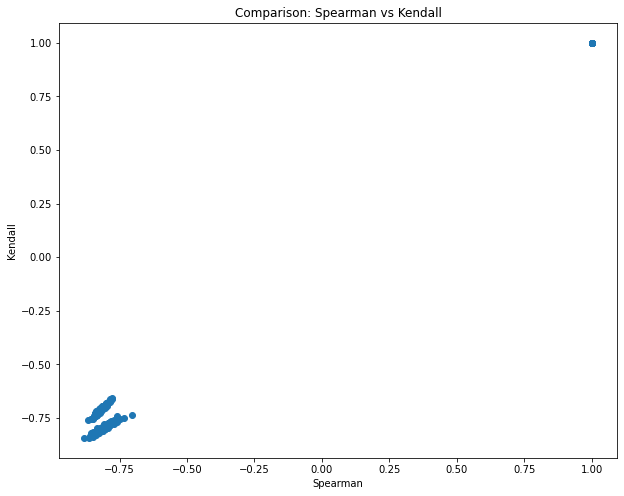

In [15]:
x = [Spear_X_Y1, Spear_X_Y2, Spear_X_Y3, Spear_X_Y4, Spear_X_Y5]
y = [Kend_X_Y1, Kend_X_Y2, Kend_X_Y3, Kend_X_Y4, Kend_X_Y5]
fig, ax = plt.subplots(1, 1, figsize=(10, 8))
plt.scatter(x=x, y=y)
plt.ylabel('Kendall')
plt.xlabel('Spearman')
plt.title('Comparison: Spearman vs Kendall')
plt.show()

Вывод: коэффициенты Спирмена и Кендалла показывают очень близкие или идентичные результаты на рассмотренных выборках. Но видно, что значения коэффициента Спирмена иногда немного больше, чем значения коэффициента ранговой корреляции Кендалла.

### Упражнение 4. Проект в закрытой формулировке.


In [16]:
import numpy as np
import seaborn as sns
import scipy
from scipy.stats import norm, probplot, rankdata
from matplotlib import pyplot as plt
from matplotlib.axes import Axes
from typing import Tuple, Dict, Optional, Set, List
import os

Text(0.5, 1.0, 'Views, sigma2=1, 99%-ile = 28.0   ')

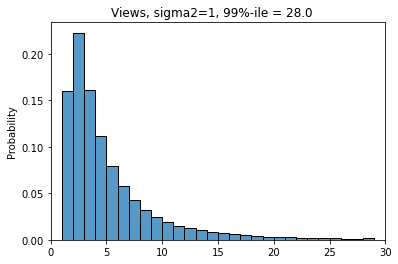

In [17]:
# Посмотрим на гистограмму views при  sigma2=1  - будем использовать в дальнейшем для оптимального распределения
mu = 1
sigma2 = 1
N = 5000
experiments = 1000
views_A = np.absolute(np.exp(norm(mu, sigma2).rvs(
    experiments * N)).astype(np.int32).reshape(experiments, N) + 1)
fig = plt.figure()
ax_views = fig.add_subplot()
views_distr = sns.histplot(views_A.ravel(),  # Теперь это массив длины experiments * N
                           bins=range(0, 30),
                           kde=False,
                           ax=ax_views,
                           stat='probability')
ax_views.set_xlim((0, 30))
views_99_percentile = np.percentile(views_A.ravel(), 99)
ax_views.set_title(f'Views, sigma2=1, 99%-ile = {views_99_percentile:<7.1f}')

Text(0.5, 1.0, 'Views (sigma2=0.1, 99%-ile = 4.0    ')

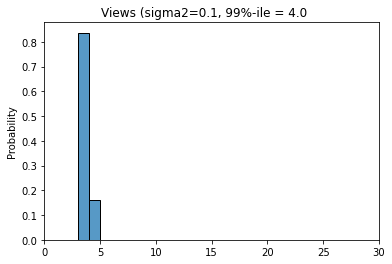

In [18]:
# Посмотрим на гистограмму views при sigma2=0.1 - будем использовать в дальнейшем для "скошенного" распределения
mu = 1
sigma2_01 = 0.1
N = 5000
experiments = 1000
views_A_si_01 = np.absolute(np.exp(norm(mu, sigma2_01).rvs(
    experiments * N)).astype(np.int32).reshape(experiments, N) + 1)
fig = plt.figure()
ax_views = fig.add_subplot()
views_distr = sns.histplot(views_A_si_01.ravel(),  # Теперь это массив длины experiments * N
                           bins=range(0, 30),
                           kde=False,
                           ax=ax_views,
                           stat='probability')
ax_views.set_xlim((0, 30))
views_99_percentile = np.percentile(views_A_si_01.ravel(), 99)
ax_views.set_title(f'Views (sigma2=0.1, 99%-ile = {views_99_percentile:<7.1f}')

Text(0.5, 1.0, 'Success rate, beta=1000, std = 0.005')

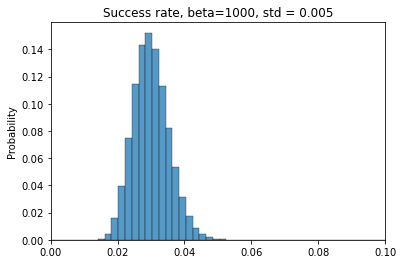

In [19]:
# Посмотрим, как выглядит success_rate_A при beta = 1000 - будем использовать в дальнейшем для оптимального распределения
success_rate = 0.03
beta = 1000
alpha = success_rate * beta / (1 - success_rate)

success_rate_A = scipy.stats.beta(alpha, beta).rvs(
    experiments * N).reshape(experiments, N)
success_rate_A.shape
fig = plt.figure()
ax_ctr = fig.add_subplot()
sns.histplot(success_rate_A.ravel(),
             bins=np.linspace(0, 0.2, 100),
             ax=ax_ctr,
             kde=False,
             stat='probability')
ax_ctr.set_xlim((0, 0.1))
success_rate_std = success_rate_A[:10].flatten().std()
ax_ctr.set_title(f'Success rate, beta=1000, std = {success_rate_std:2.3f}')

Text(0.5, 1.0, 'Success rate (beta=10), std = 0.005')

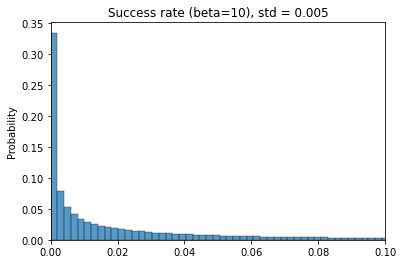

In [20]:
# Посмотрим, как выглядит success_rate_A при beta = 10 - будем использовать в дальнейшем для "скошенного" распределения 
success_rate = 0.03
beta_10 = 10
alpha = success_rate * beta_10 / (1 - success_rate)

success_rate_A_10 = scipy.stats.beta(alpha, beta_10).rvs(
    experiments * N).reshape(experiments, N)
fig = plt.figure()
ax_ctr = fig.add_subplot()
sns.histplot(success_rate_A_10.ravel(),
             bins=np.linspace(0, 0.2, 100),
             ax=ax_ctr,
             kde=False,
             stat='probability')
ax_ctr.set_xlim((0, 0.1))
success_rate_10_std = success_rate_A_10[:10].flatten().std()
ax_ctr.set_title(f'Success rate (beta=10), std = {success_rate_std:2.3f}')

In [21]:
# Клики группы А
clicks_A = scipy.stats.binom.rvs(views_A, success_rate_A)

# Сколько кликов было максимум
clicks_A.max()


20

(0.0, 10.0)

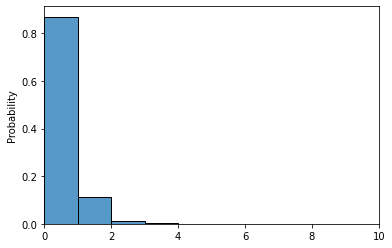

In [22]:
fig = plt.figure()
ax_clicks = fig.add_subplot()
clicks_distr = sns.histplot(clicks_A.ravel(),  # Теперь это массив длины experiments * N
                            bins=range(0, 10),
                            kde=False,
                            ax=ax_clicks,
                            stat='probability')
ax_clicks.set_xlim((0, 10))

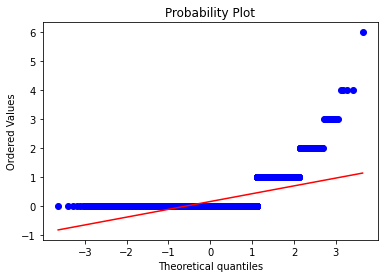

In [23]:
f = probplot(np.random.choice(clicks_A.ravel(),5000), dist="norm",plot=plt)

In [24]:
# Применяем uplift = 0.1
uplift = 0.1
views_B = np.absolute(np.exp(norm(mu, sigma2).rvs(experiments * N)).astype(np.int32).reshape(experiments, N) + 1)
alpha_B = success_rate * (1 + uplift) * beta / (1 - success_rate * (1 + uplift))
success_rate_B = scipy.stats.beta(alpha_B, beta).rvs(experiments * N).reshape(experiments, N)
clicks_B = scipy.stats.binom(n=views_B, p=success_rate_B).rvs()


1000


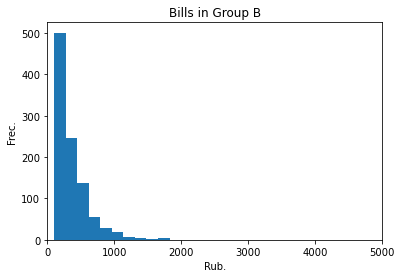

In [25]:
# Моделируем чеки в группе B
Lambda = 0.004
C = 1 # мне не понадобилась константа С
lower, upper, scale = 100, 2500, 1/Lambda
X = stats.truncexpon(b=(upper-lower)/scale, loc=lower, scale=scale)
b_b = C * X.rvs(1000)

plt.hist(b_b)
plt.xlim(0, 5000)
plt.xlabel('Rub.')
plt.ylabel('Frec.')
plt.title('Bills in Group B')
print(len(b_b))

1000


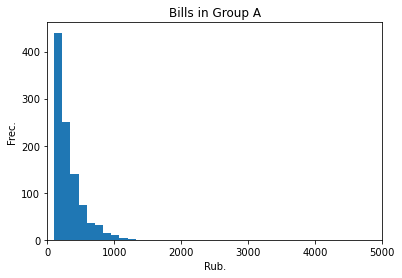

In [26]:
# Моделируем чеки в группе A
Lambda = 1.2*0.004
C = 1 # мне не понадобилась константа С
lower, upper, scale = 100, 2500, 1/Lambda
X = stats.truncexpon(b=(upper-lower)/scale, loc=lower, scale=scale)
b_a = C * X.rvs(1000)

plt.hist(b_a)
plt.xlim(0, 5000)
plt.xlabel('Rub.')
plt.ylabel('Frec.')
plt.title('Bills in Group A')
print(len(b_a))

In [27]:
print("средний чек в группе B", b_b.mean())
print("средний чек в группе A", b_a.mean())

средний чек в группе B 347.6962850478127
средний чек в группе A 305.79367266206674


In [28]:
print(np.quantile(b_b, 0.8))
print(np.quantile(b_a, 0.8))

501.15889210079234
429.71995503343203


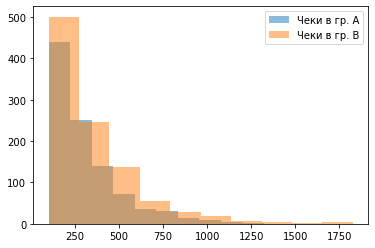

In [29]:
from matplotlib import pyplot

pyplot.hist(b_a, alpha=0.5, label='Чеки в гр. А')
pyplot.hist(b_b, alpha=0.5, label='Чеки в гр. B')
pyplot.legend(loc='upper right')
pyplot.show()

In [30]:
#t_test на кол-ве кликов
def t_test(a, b):
    """
    Считает p-value для t-теста с двусторонней альтернативой 
    :param a: np.array вида (n_experiments, n_users), значения метрик в контрольных группах
    :param b: np.array вида (n_experiments, n_users), значения метрик в тестовых группах
    :return: np.array вида (n_experiments), посчитанные p-value t-теста для всего списка экспериментов
    """
    result = list(map(lambda x: scipy.stats.ttest_ind(
        x[0], x[1]).pvalue, zip(a, b)))
    return np.array(result)

(0.0, 1.0)

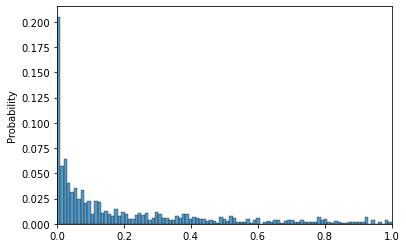

In [31]:
p_values = t_test(clicks_B, clicks_A)
fig, axes = plt.subplots(ncols=1, nrows=1)
p_values_distr = sns.histplot(p_values,  # Теперь это массив длины experiments * N
                              bins=np.linspace(0, 1, 100),
                              kde=False,
                              ax=axes,
                              stat='probability')
axes.set_xlim((0, 1))

In [32]:
# Палитра цветов
colors = sns.color_palette("deep")


def plot_cdf(data: np.ndarray, label: str, ax: Axes, color: str = colors[0], linewidth=3):
    sorted_data = np.sort(data)
    position = scipy.stats.rankdata(sorted_data, method='ordinal')
    cdf = position / data.shape[0]

    sorted_data = np.hstack((sorted_data, 1))
    cdf = np.hstack((cdf, 1))

    return ax.plot(sorted_data,
                   cdf,
                   color=color,
                   linestyle='solid',
                   label=label,
                   linewidth=linewidth)

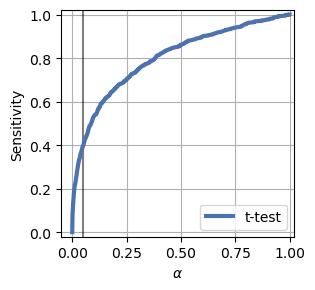

In [33]:
fig, ax = plt.subplots(figsize=(3, 3), dpi = 100)
gr = ax.grid(True)
xlim = ax.set_xlim(-0.05,1.02)
ylim = ax.set_ylim(-0.02,1.02)
ax.axvline(0.05, color='k', alpha=0.5)
cdf = plot_cdf(p_values,'t-test',ax)
ax.set_xlabel(r'$\alpha$')
ax.set_ylabel('Sensitivity')
legend = ax.legend()

In [34]:
uplift = 0
views_B = np.absolute(np.exp(norm(mu, sigma2).rvs(
    experiments * N)).astype(np.int32).reshape(experiments, N) + 1)
alpha_B = success_rate * (1 + uplift) * beta / \
    (1 - success_rate * (1 + uplift))
success_rate_B = scipy.stats.beta(alpha_B, beta).rvs(
    experiments * N).reshape(experiments, N)
clicks_B = scipy.stats.binom(n=views_B, p=success_rate_B).rvs()

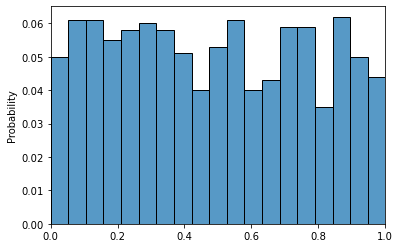

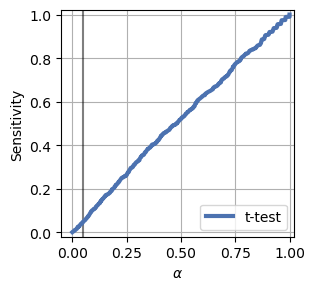

In [35]:
p_values = t_test(clicks_B, clicks_A)
fig, axes = plt.subplots(ncols=1, nrows=1)
p_values_distr = sns.histplot(p_values, # Теперь это массив длины experiments * N 
                 bins=np.linspace(0, 1, 20),
                 kde=False,
                 ax = axes,
                 stat='probability')
axes.set_xlim((0, 1))

fig, ax = plt.subplots(figsize=(3, 3), dpi = 100)
gr = ax.grid(True)
xlim = ax.set_xlim(-0.05,1.02)
ylim = ax.set_ylim(-0.02,1.02)
ax.axvline(0.05, color='k', alpha=0.5)
cdf = plot_cdf(p_values,'t-test',ax)
ax.set_xlabel(r'$\alpha$')
ax.set_ylabel('Sensitivity')
legend = ax.legend()

In [36]:
# Сгенерируем суммы покупок в группе B
bills_b = b_b*clicks_B.T
pd.DataFrame(bills_b).head(10)

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,0.0,0.000000,217.946131,0.000000,0.000000,138.144567,0.0,0.000000,0.000000,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
1,0.0,0.000000,217.946131,0.000000,329.993599,0.000000,0.0,0.000000,0.000000,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,316.824117,0.0,0.000000,0.000000
2,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,...,0.000000,509.260164,0.000000,0.000000,0.000000,1481.217065,0.000000,0.0,0.000000,392.986648
3,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,...,0.000000,0.000000,0.000000,0.000000,100.060489,0.000000,0.000000,0.0,0.000000,0.000000
4,0.0,545.597961,0.000000,216.059961,0.000000,0.000000,0.0,0.000000,0.000000,0.0,...,0.000000,0.000000,0.000000,179.051943,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
5,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,124.437371,0.0,...,125.087051,0.000000,0.000000,0.000000,100.060489,0.000000,0.000000,0.0,0.000000,392.986648
6,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,126.704977,124.437371,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,332.258988,0.000000
7,0.0,0.000000,0.000000,216.059961,0.000000,138.144567,0.0,0.000000,0.000000,0.0,...,0.000000,0.000000,0.000000,179.051943,0.000000,0.000000,316.824117,0.0,0.000000,0.000000
8,0.0,545.597961,0.000000,0.000000,0.000000,138.144567,0.0,0.000000,0.000000,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,392.986648
9,0.0,0.000000,217.946131,0.000000,0.000000,138.144567,0.0,0.000000,124.437371,0.0,...,0.000000,0.000000,1213.380882,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000


In [37]:
# Сгенерируем суммы покупок в группе A
bills_a = clicks_A.T*b_a.T
pd.DataFrame(bills_a).head(10)

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.0,0.000000,462.199466,0.000000,...,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000
1,0.000000,0.000000,400.08763,0.000000,855.060857,0.000000,0.0,0.000000,0.000000,0.000000,...,0.0,0.000000,0.0,0.0,388.443562,0.000000,0.0,0.000000,0.0,0.000000
2,0.000000,0.000000,400.08763,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,...,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000
3,282.560939,178.102186,0.00000,0.000000,0.000000,0.000000,0.0,117.606946,0.000000,0.000000,...,0.0,0.000000,0.0,0.0,0.000000,514.629935,0.0,0.000000,0.0,0.000000
4,0.000000,178.102186,0.00000,165.576573,0.000000,0.000000,0.0,0.000000,0.000000,263.844161,...,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000
5,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,...,0.0,388.688374,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000
6,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,...,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,527.816114,0.0,149.433226
7,0.000000,178.102186,0.00000,165.576573,0.000000,341.051981,0.0,0.000000,462.199466,0.000000,...,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000
8,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,...,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000
9,0.000000,178.102186,0.00000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,...,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000


Средний чек в гр. B: 398.1726765429947
80 квантиль по чекам в гр. B: 556.4138440993959


(5000, 1000)

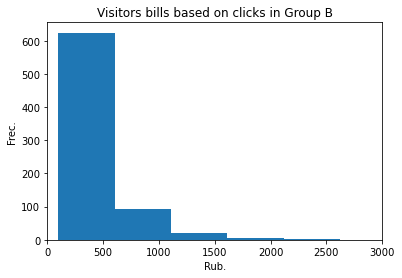

In [38]:
# Visitors bills based on clicks in Group B
bills_b_df = pd.DataFrame(bills_b).head(10)
average_b = bills_b_df[bills_b_df!=0].mean()
print("Средний чек в гр. B:", average_b.mean())
print("80 квантиль по чекам в гр. B:", average_b.quantile(0.8))
plt.hist(average_b)
plt.xlim(0, 3000)
plt.xlabel('Rub.')
plt.ylabel('Frec.')
plt.title('Visitors bills based on clicks in Group B')
bills_b.shape

Средний чек в гр. А: 347.1983416619546
80 квантиль по чекам в гр. А: 478.18359369167905


(5000, 1000)

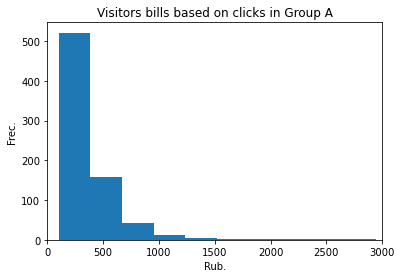

In [39]:
# Visitors bills based on clicks in Group A
bills_a_df = pd.DataFrame(bills_a).head(10)
average_a = bills_a_df[bills_a_df!=0].mean()
print("Средний чек в гр. А:", average_a.mean())
print("80 квантиль по чекам в гр. А:", average_a.quantile(0.8))
plt.hist(average_a)
plt.xlim(0, 3000)
plt.xlabel('Rub.')
plt.ylabel('Frec.')
plt.title('Visitors bills based on clicks in Group A')
bills_a.shape

In [40]:
#Генерация данных (sigma2 и beta настраиваются) 
def generation(N=5000,  # Кол-во человек в выборке
               experiments=2000,  # Кол-во синтетических экспериментов А/А и А/В
               # Один из параметров распределения просмотров (можете самостоятельно его пошатать)
               mu=1,
               # Скошенность распределения просмотров (можете самостоятельно его пошатать)
               sigma2=sigma2,
               success_rate=0.03,  # Истинный CTR в контрольной группе
               uplift=0.1,  # Аплифт теста над контролем. По умолчанию 20%
               beta=beta# Параметр для контроля дисперсии распределения истинного CTR
               ):

    # На просмотры мы не влияем, поэтому тут сэмплирование одинаковое
    # Но что будет, если мы влияем на просмотры?
    views_a_1 = np.exp(norm(mu, sigma2).rvs(experiments * N)
                       ).astype(np.int32).reshape(experiments, N) + 1
    views_a_2 = np.exp(norm(mu, sigma2).rvs(experiments * N)
                       ).astype(np.int32).reshape(experiments, N) + 1
    views_b = np.exp(norm(mu, sigma2).rvs(experiments * N)
                     ).astype(np.int32).reshape(experiments, N) + 1

    # Правит проблемы для случаев слишком большой скошенности
    views_a_1 = np.absolute(views_a_1)
    views_a_2 = np.absolute(views_a_2)
    views_b = np.absolute(views_b)

    # Истинный CTR для групп А/А
    alpha_a = success_rate * beta / (1 - success_rate)
    success_rate_a_1 = scipy.stats.beta(alpha_a, beta).rvs(
        experiments * N).reshape(experiments, N)
    success_rate_a_2 = scipy.stats.beta(alpha_a, beta).rvs(
        experiments * N).reshape(experiments, N)

    # Истинный CTR для группы В
    alpha_b = success_rate * (1 + uplift) * beta / \
        (1 - success_rate * (1 + uplift))
    success_rate_b = scipy.stats.beta(alpha_b, beta).rvs(
        experiments * N).reshape(experiments, N)

    # Распределение кликов в группах
    clicks_a_1 = scipy.stats.binom(n=views_a_1, p=success_rate_a_1).rvs()
    clicks_a_2 = scipy.stats.binom(n=views_a_2, p=success_rate_a_2).rvs()
    clicks_b = scipy.stats.binom(n=views_b, p=success_rate_b).rvs()
    
    # Моделируем чеки в группе A
    Lambda = 1.2*0.004
    C = 1 # мне не понадобилась константа С
    lower, upper, scale = 100, 2500, 1/Lambda
    X = stats.truncexpon(b=(upper-lower)/scale, loc=lower, scale=scale)
    b_a = C * X.rvs(2000)
    
    # Моделируем чеки в группе B
    Lambda1 = 0.004
    C = 1 # мне не понадобилась константа С
    lower, upper, scale = 100, 2500, 1/Lambda1
    X = stats.truncexpon(b=(upper-lower)/scale, loc=lower, scale=scale)
    b_b = C * X.rvs(2000)
    
    # Добавляем параметр "Распределение чеков в группах"
    bills_a_1 = (b_a*clicks_a_1.T).T
    bills_a_2 = (b_a*clicks_a_2.T).T
    bills_b = (b_b*clicks_b.T).T

    return views_a_1, views_a_2, views_b,\
        success_rate_a_1, success_rate_a_2, success_rate_b,\
        clicks_a_1, clicks_a_2, clicks_b, \
        bills_a_1, bills_a_2, bills_b

In [41]:
# # Генерируем и сохраняем выборки с оптимальными сигма2 и бета (sigma2=1, beta=1000)

# # ЯЧЕЙКУ НЕ ЗАПУСКАЮ

# views_a_1_opt = generation(sigma2=1, beta=1000)[0]
# views_a_1_opt = np.save('views_a_1_opt', views_a_1_opt)

# views_a_2_opt = generation(sigma2=1, beta=1000)[1]
# views_a_2_opt = np.save('views_a_2_opt', views_a_2_opt)

# views_b_opt = generation(sigma2=1, beta=1000)[2]
# views_b_opt = np.save('views_b_opt', views_b_opt)

# success_rate_a_1_opt = generation(sigma2=1, beta=1000)[3]
# success_rate_a_1_opt = np.save('success_rate_a_1_opt', success_rate_a_1_opt)

# success_rate_a_2_opt = generation(sigma2=1, beta=1000)[4]
# success_rate_a_2_opt = np.save('success_rate_a_2_opt', success_rate_a_2_opt)

# success_rate_b_opt = generation(sigma2=1, beta=1000)[5]
# success_rate_b_opt = np.save('success_rate_b_opt', success_rate_b_opt)

# clicks_a_1_opt = generation(sigma2=1, beta=1000)[6] 
# clicks_a_1_opt = np.save('clicks_a_1_opt', clicks_a_1_opt)

# clicks_a_2_opt = generation(sigma2=1, beta=1000)[7] 
# clicks_a_2_opt = np.save('clicks_a_2_opt', clicks_a_2_opt)

# clicks_b_opt = generation(sigma2=1, beta=1000)[8] 
# clicks_b_opt = np.save('clicks_b_opt', clicks_b_opt)

# bills_a_1_opt = generation(sigma2=1, beta=1000)[9] 
# bills_a_1_opt = np.save('bills_a_1_opt', bills_a_1_opt)

# bills_a_2_opt = generation(sigma2=1, beta=1000)[10] 
# bills_a_2_opt = np.save('bills_a_2_opt', bills_a_2_opt)

# bills_b_opt = generation(sigma2=1, beta=1000)[11] 
# bills_b_opt = np.save('bills_b_opt', bills_b_opt)

In [42]:
np.load('views_a_1_opt.npy').shape

(2000, 5000)

In [43]:
# # Генерируем и сохраняем выборки со "скошенными" сигма2 и бета(sigma2=0.1, beta=10)

# # ЯЧЕЙКУ НЕ ЗАПУСКАЮ 

# views_a_1_sk = generation(sigma2=0.1, beta=10)[0]
# views_a_1_sk = np.save('views_a_1_sk', views_a_1_sk)

# views_a_2_sk = generation(sigma2=0.1, beta=10)[1]
# views_a_2_sk = np.save('views_a_2_sk', views_a_2_sk)

# views_b_sk = generation(sigma2=0.1, beta=10)[2]
# views_b_sk = np.save('views_b_sk', views_b_sk)

# success_rate_a_1_sk = generation(sigma2=0.1, beta=10)[3]
# success_rate_a_1_sk = np.save('success_rate_a_1_sk', success_rate_a_1_sk)

# success_rate_a_2_sk = generation(sigma2=0.1, beta=10)[4]
# success_rate_a_2_sk = np.save('success_rate_a_2_sk', success_rate_a_2_sk)

# success_rate_b_sk = generation(sigma2=0.1, beta=10)[5]
# success_rate_b_sk = np.save('success_rate_b_sk', success_rate_b_sk)

# clicks_a_1_sk = generation(sigma2=0.1, beta=10)[6] 
# clicks_a_1_sk = np.save('clicks_a_1_sk', clicks_a_1_sk)

# clicks_a_2_sk = generation(sigma2=0.1, beta=10)[7] 
# clicks_a_2_sk = np.save('clicks_a_2_sk', clicks_a_2_sk)

# clicks_b_sk = generation(sigma2=0.1, beta=10)[8] 
# clicks_b_sk = np.save('clicks_b_sk', clicks_b_sk)

# bills_a_1_sk = generation(sigma2=0.1, beta=10)[9] 
# bills_a_1_sk = np.save('bills_a_1_sk', bills_a_1_sk)

# bills_a_2_sk = generation(sigma2=0.1, beta=10)[10] 
# bills_a_2_sk = np.save('bills_a_2_sk', bills_a_2_sk)

# bills_b_sk = generation(sigma2=0.1, beta=10)[11] 
# bills_b_sk = np.save('bills_b_sk', bills_b_sk)

In [44]:
np.load('bills_b_sk.npy').shape

(2000, 5000)

In [45]:
# Генерируем выборки с 80 квантилями 
b_a_1_80_opt = np.load('bills_a_1_opt.npy') 
b_a_1_80_opt[b_a_1_80_opt==0] = 'nan' 
b_a_1_80_opt = np.nanquantile(b_a_1_80_opt, 0.8, axis=1)

b_a_2_80_opt = np.load('bills_a_2_opt.npy') 
b_a_2_80_opt[b_a_2_80_opt==0] = 'nan' 
b_a_2_80_opt = np.nanquantile(b_a_2_80_opt, 0.8, axis=1)

b_b_80_opt = np.load('bills_b_opt.npy') 
b_b_80_opt[b_b_80_opt==0] = 'nan' 
b_b_80_opt = np.nanquantile(b_b_80_opt, 0.8, axis=1)

b_a_1_80_sk = np.load('bills_a_1_sk.npy') 
b_a_1_80_sk[b_a_1_80_sk==0] = 'nan' 
b_a_1_80_sk = np.nanquantile(b_a_1_80_sk, 0.8, axis=1)

b_a_2_80_sk = np.load('bills_a_2_sk.npy') 
b_a_2_80_sk[b_a_2_80_sk==0] = 'nan' 
b_a_2_80_sk = np.nanquantile(b_a_2_80_sk, 0.8, axis=1)

b_b_80_sk = np.load('bills_b_sk.npy') 
b_b_80_sk[b_b_80_sk==0] = 'nan' 
b_b_80_sk = np.nanquantile(b_b_80_sk, 0.8, axis=1)


In [46]:
# Генерируем выборки 80 квантилей с помощью бутстрепа для дальнейших тестов
boots_b_a_1_80_opt = np.array([np.random.choice(b_a_1_80_opt,size=len(b_a_1_80_opt),replace=True) for i in range(3000)])
boots_b_a_1_80_sk = np.array([np.random.choice(b_a_1_80_sk,size=len(b_a_1_80_sk),replace=True) for i in range(3000)])
boots_b_a_2_80_opt = np.array([np.random.choice(b_a_2_80_opt,size=len(b_a_2_80_opt),replace=True) for i in range(3000)])
boots_b_a_2_80_sk = np.array([np.random.choice(b_a_2_80_sk,size=len(b_a_2_80_sk),replace=True) for i in range(3000)])
boots_b_b_80_opt = np.array([np.random.choice(b_b_80_opt,size=len(b_b_80_opt),replace=True) for i in range(3000)])
boots_b_b_80_sk = np.array([np.random.choice(b_b_80_sk,size=len(b_b_80_sk),replace=True) for i in range(3000)])


In [47]:
boots_b_b_80_sk.shape

(3000, 2000)

# Далее будем пытаться проанализовать 80-е квантили выборок А и B

## Пуассоновский бутстреп

In [48]:
def bootstrap(ctrs_0, weights_0, ctrs_1, weights_1, n_bootstrap=500):
    """
    Считает взвешенный bootstrap и вычисляет p-value по распределению статистик из псевдовыборок
    :param ctrs_0: np.array вида (n_experiments, n_users), 
        CTR каждого пользователя из контрольной группы в каждом эксперименте 
        
    :param weights_0: np.array (n_experiments, n_users), 
        вес каждого пользователя из контрольной группы в каждом эксперименте 
        
    :param ctrs_1: np.array (n_experiments, n_users), 
        CTR каждого пользователя из целевой группы в каждом эксперименте 
        
    :param weights_1: np.array (n_experiments, n_users), 
        вес каждого пользователя из целевой группы в каждом эксперименте 
        
    :param n_bootstrap: int - кол-во бутстрапированных псевдовыборок для каждого эксперимента
    :return: np.array shape (n_experiments), двусторонние p-value
    """
    poisson_bootstraps = scipy.stats.poisson(1).rvs(
        (n_bootstrap, ctrs_0.shape[1])).astype(np.int64)

    values_0 = np.matmul(ctrs_0 * weights_0, poisson_bootstraps.T)
    weights_0 = np.matmul(weights_0, poisson_bootstraps.T)

    values_1 = np.matmul(ctrs_1 * weights_1, poisson_bootstraps.T)
    weights_1 = np.matmul(weights_1, poisson_bootstraps.T)

    deltas = values_1 / weights_1 - values_0 / weights_0

    positions = np.sum(deltas < 0, axis=1)

    return 2 * np.minimum(positions, n_bootstrap - positions) / n_bootstrap


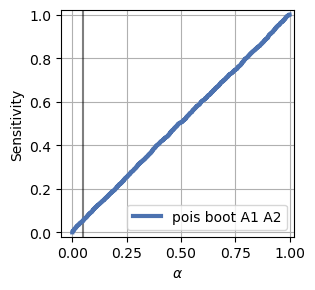

In [49]:
# Выборка а_1 и a_2 
p_values = bootstrap(boots_b_a_1_80_opt, boots_b_a_1_80_sk, 
                     boots_b_a_2_80_opt, boots_b_a_2_80_sk)
fig, ax = plt.subplots(figsize=(3, 3), dpi = 100)
gr = ax.grid(True)
xlim = ax.set_xlim(-0.05,1.02)
ylim = ax.set_ylim(-0.02,1.02)
ax.axvline(0.05, color='k', alpha=0.5)
ax.set_xlabel(r'$\alpha$')
ax.set_ylabel('Sensitivity')
cdf = plot_cdf(p_values,'pois boot A1 A2',ax)
legend = ax.legend()

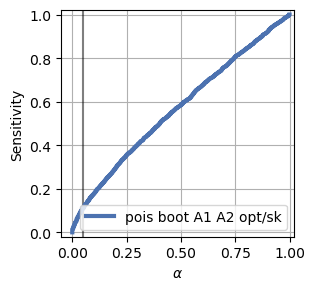

In [50]:
# Выборка а_1 и a_2, сравним оптимальные и "скошенные" выборки
p_values = bootstrap(boots_b_a_1_80_opt, boots_b_a_2_80_opt, 
                     boots_b_a_1_80_sk, boots_b_a_2_80_sk)
fig, ax = plt.subplots(figsize=(3, 3), dpi = 100)
gr = ax.grid(True)
xlim = ax.set_xlim(-0.05,1.02)
ylim = ax.set_ylim(-0.02,1.02)
ax.axvline(0.05, color='k', alpha=0.5)
ax.set_xlabel(r'$\alpha$')
ax.set_ylabel('Sensitivity')
cdf = plot_cdf(p_values,'pois boot A1 A2 opt/sk',ax)
legend = ax.legend()

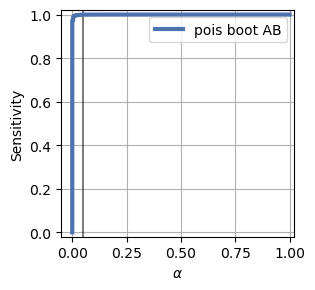

In [51]:
# Выборка а_1 и b
p_values = bootstrap(boots_b_a_1_80_opt, boots_b_a_1_80_sk, 
                     boots_b_b_80_opt, boots_b_b_80_sk)
fig, ax = plt.subplots(figsize=(3, 3), dpi = 100)
gr = ax.grid(True)
xlim = ax.set_xlim(-0.05,1.02)
ylim = ax.set_ylim(-0.02,1.02)
ax.axvline(0.05, color='k', alpha=0.5)
ax.set_xlabel(r'$\alpha$')
ax.set_ylabel('Sensitivity')
cdf = plot_cdf(p_values,'pois boot AB',ax)
legend = ax.legend()

## Тест Манна-Уитни поверх бакетного преобразования 

In [52]:
def bucketization(ctrs_0, weights_0, ctrs_1, weights_1, n_buckets=10):
    """
    Разбиваем на бакеты с весами
    :param ctrs_0: np.array shape (n_experiments, n_users), CTRs of every user from control group in every experiment
    :param weights_0: np.array (n_experiments, n_users), веса пользователей в контрольной группе
    :param ctrs_1: np.array (n_experiments, n_users), CTRs of every user from treatment group in every experiment
    :param weights_1: np.array (n_experiments, n_users), веса пользователей в целевой группе
    :param n_buckets: int, кол-во бакетов
    :return: np.array shape (n_experiments), средневзвешенные метрики в каждом бакете
    """

    n_experiments, n_users = ctrs_0.shape

    values_0 = np.zeros((n_experiments, n_buckets))
    values_1 = np.zeros((n_experiments, n_buckets))

    for b in np.arange(n_buckets):
        ind = np.arange(b * n_users / n_buckets, b * n_users / n_buckets + n_users / n_buckets).astype(np.int32)
        values_0[:, b] = np.sum(ctrs_0[:, ind] * weights_0[:, ind], axis=1) / np.sum(weights_0[:, ind], axis=1)
        values_1[:, b] = np.sum(ctrs_1[:, ind] * weights_1[:, ind], axis=1) / np.sum(weights_1[:, ind], axis=1)

    return values_0, values_1


In [53]:
def mannwhitney(a, b):
    """
    Двусторонний тест Манна-Уитни
    :param a: np.array вида (n_experiments, n_users), значения метрики в контроле
    :param b: np.array вида (n_experiments, n_users), значен я метрики в тесте
    :return: np.array вида (n_experiments), двусторонние p-value методом Манна-Уитни для всех экспериментов
    """
    result = list(map(lambda x: scipy.stats.mannwhitneyu(
        x[0], x[1], alternative='two-sided').pvalue, zip(a, b)))
    return np.array(result)

In [54]:
# тест Манна-Уитни поверх бакетов
def mannwhitney_buckets(ctrs_0, weights_0, ctrs_1, weights_1, n_buckets=100):
    return mannwhitney(*bucketization(ctrs_0, weights_0, ctrs_1, weights_1, n_buckets))


In [55]:
mannwhitney_buckets(boots_b_a_1_80_opt, boots_b_a_1_80_sk, 
                     boots_b_b_80_opt, boots_b_b_80_sk)

array([1.71916838e-08, 7.62786172e-13, 9.25495765e-11, ...,
       2.83115697e-09, 2.56801675e-05, 1.95037030e-06])

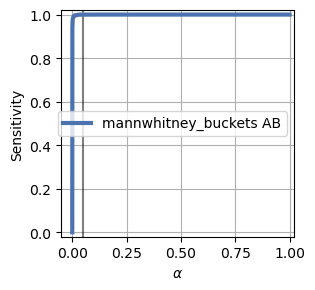

In [56]:
# Выборка а_2 и b
p_values = mannwhitney_buckets(boots_b_a_2_80_opt, boots_b_a_2_80_sk, 
                     boots_b_b_80_opt, boots_b_b_80_sk)
fig, ax = plt.subplots(figsize=(3, 3), dpi = 100)
gr = ax.grid(True)
xlim = ax.set_xlim(-0.05,1.02)
ylim = ax.set_ylim(-0.02,1.02)
ax.axvline(0.05, color='k', alpha=0.5)
ax.set_xlabel(r'$\alpha$')
ax.set_ylabel('Sensitivity')
cdf = plot_cdf(p_values,'mannwhitney_buckets AB',ax)
legend = ax.legend()

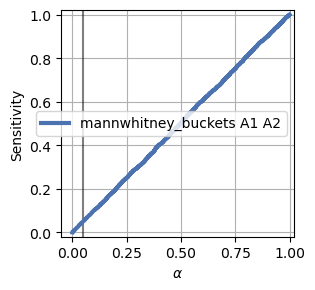

In [57]:
# Выборка а_1 и a_2
p_values = mannwhitney_buckets(boots_b_a_1_80_opt, boots_b_a_1_80_sk, 
                     boots_b_a_2_80_opt, boots_b_a_2_80_sk)
fig, ax = plt.subplots(figsize=(3, 3), dpi = 100)
gr = ax.grid(True)
xlim = ax.set_xlim(-0.05,1.02)
ylim = ax.set_ylim(-0.02,1.02)
ax.axvline(0.05, color='k', alpha=0.5)
ax.set_xlabel(r'$\alpha$')
ax.set_ylabel('Sensitivity')
cdf = plot_cdf(p_values,'mannwhitney_buckets A1 A2',ax)
legend = ax.legend()

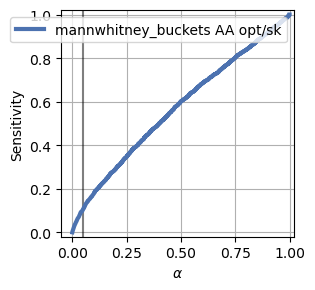

In [58]:
# Выборка а_1 и a_2 - сравниваем оптимальные и скошенные выборки
p_values = mannwhitney_buckets(boots_b_a_1_80_opt, boots_b_a_2_80_opt, 
                     boots_b_a_1_80_sk, boots_b_a_2_80_sk)
fig, ax = plt.subplots(figsize=(3, 3), dpi = 100)
gr = ax.grid(True)
xlim = ax.set_xlim(-0.05,1.02)
ylim = ax.set_ylim(-0.02,1.02)
ax.axvline(0.05, color='k', alpha=0.5)
ax.set_xlabel(r'$\alpha$')
ax.set_ylabel('Sensitivity')
cdf = plot_cdf(p_values,'mannwhitney_buckets AA opt/sk',ax)
legend = ax.legend()

Графики выглядят практически идентично, попробуем протестировать различия в квантилях немного по-другому

Text(0.5, 1.0, 'Sample A2 Boxplot opt/sk')

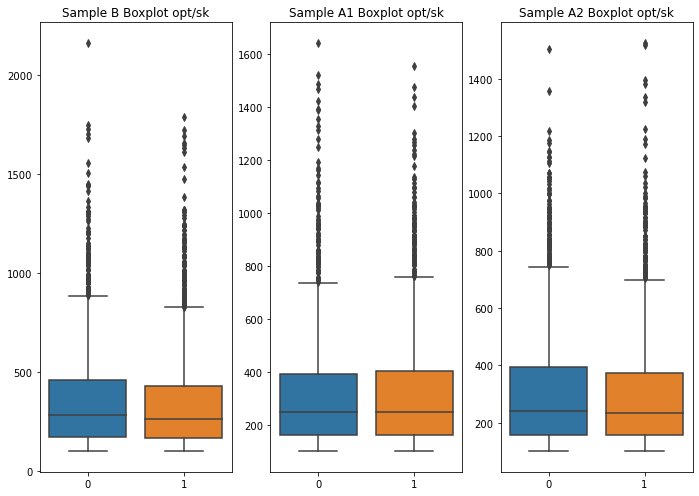

In [59]:
# Нарисуем Boxplot 80-х квантилей выборок
import seaborn as sns
f, axes = plt.subplots(1, 3, figsize=(11.7, 8.27))
sns.boxplot(data=[b_b_80_opt, b_b_80_sk], ax=axes[0])
axes[0].set_title("Sample B Boxplot opt/sk")
sns.boxplot(data=[b_a_1_80_opt, b_a_1_80_sk], ax=axes[1])
axes[1].set_title("Sample A1 Boxplot opt/sk")
sns.boxplot(data=[b_a_2_80_opt, b_a_2_80_sk], ax=axes[2])
axes[2].set_title("Sample A2 Boxplot opt/sk")

In [60]:
# Посмотрим на дов. интервалы
def bootstrap_1(data, n=1000, func=np.mean):
    simulations = list()
    sample_size = len(data)
    xbar_init = np.mean(data)
    for c in range(n):
        itersample = np.random.choice(data, size=sample_size, replace=True)
        simulations.append(func(itersample))
    simulations.sort()
    def ci(p):
        """
        Return 2-sided symmetric confidence interval specified
        by p.
        """
        u_pval = (1+p)/2.
        l_pval = (1-u_pval)
        l_indx = int(np.floor(n*l_pval))
        u_indx = int(np.floor(n*u_pval))
        return(simulations[l_indx],simulations[u_indx])
    return(ci(0.95))
   
print('ДИ 80 кв. оптимальной и скош. выборок группы B:\n', bootstrap_1(b_b_80_opt), bootstrap_1(b_b_80_sk))
print('ДИ 80 кв. оптимальной и скош. выборок группы A1:\n', bootstrap_1(b_a_1_80_opt), bootstrap_1(b_a_1_80_opt))
print('ДИ 80 кв. оптимальной и скош. выборок группы A2:\n', bootstrap_1(b_a_2_80_opt), bootstrap_1(b_a_2_80_opt))

ДИ 80 кв. оптимальной и скош. выборок группы B:
 (343.47357688446704, 365.961514731141) (329.5375948316481, 351.9389797745351)
ДИ 80 кв. оптимальной и скош. выборок группы A1:
 (301.1140661918187, 318.7121578220442) (301.301778662674, 319.3011303193682)
ДИ 80 кв. оптимальной и скош. выборок группы A2:
 (300.0897876361056, 318.35022566917445) (300.69654464052235, 319.3501145972403)


## Бутстреп для сравнения 80-х квантилей 

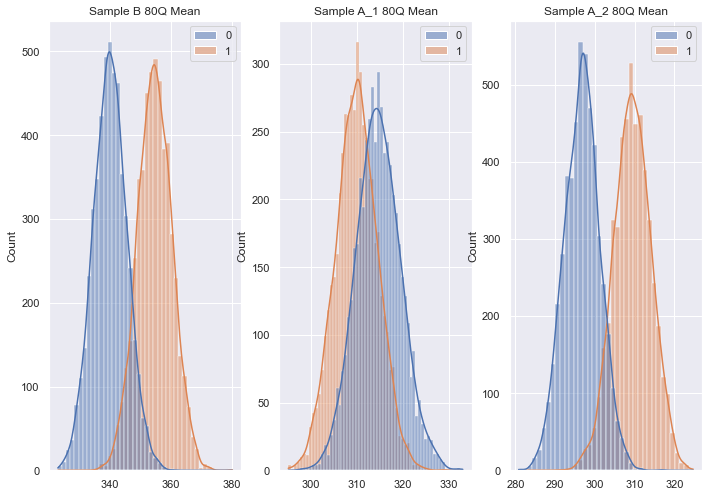

In [61]:
"""
Сгенерируем гистограммы для распределений средних значений 
в выборках a_1, a_2 и b (5000 bootstrap resamplings).
"""

import seaborn as sns
sns.set(style="darkgrid")

v = b_b_80_sk
v1 = b_b_80_opt
xbar_init = np.round(np.mean(v), 2)
xbar_init1 = np.round(np.mean(v1), 2)
# generate 5000 resampled sample means 
means = [np.mean(np.random.choice(v,size=len(v),replace=True)) for i in range(5000)]
means1 = [np.mean(np.random.choice(v1,size=len(v1),replace=True)) for i in range(5000)]
data = pd.DataFrame([means, means1]).T

v2 = b_a_1_80_sk
v3 = b_a_1_80_opt
xbar_init2 = np.round(np.mean(v2), 2)
xbar_init3 = np.round(np.mean(v3), 2)
# generate 5000 resampled sample means 
means2 = [np.mean(np.random.choice(v2,size=len(v2),replace=True)) for i in range(5000)]
means3 = [np.mean(np.random.choice(v3,size=len(v3),replace=True)) for i in range(5000)]
data1 = pd.DataFrame([means2, means3]).T

v4 = b_a_2_80_sk
v5 = b_a_2_80_opt
xbar_init3 = np.round(np.mean(v4), 2)
xbar_init4 = np.round(np.mean(v5), 2)
# generate 5000 resampled sample means 
means4 = [np.mean(np.random.choice(v4,size=len(v4),replace=True)) for i in range(5000)]
means5 = [np.mean(np.random.choice(v5,size=len(v5),replace=True)) for i in range(5000)]
data2 = pd.DataFrame([means4, means5]).T

f, axes = plt.subplots(1, 3, figsize=(11.7, 8.27))
sns.histplot(data, color='r', label="Sample B 80Q Mean", kde=True, ax=axes[0])
axes[0].set_title("Sample B 80Q Mean")
sns.histplot(data1, color='r', label="Sample A_1 80Q Mean", kde=True, ax=axes[1])
axes[1].set_title("Sample A_1 80Q Mean")
sns.histplot(data2, color='r', label="Sample A_2 80Q Mean", kde=True, ax=axes[2])
axes[2].set_title("Sample A_2 80Q Mean")

plt.show()

## Bootstrap p_values 

In [62]:
def boot_matrix(z, B):
    n = len(z)  # sample size
    idz = np.random.randint(0, n, size=(B, n))  # indices to pick for all boostrap samples
    return z[idz]
def bootstrap_t_pvalue(x, y, equal_var=False, B=10000, plot=False):
    """Bootstrap p values for two-sample t test
    
    Returns boostrap p value, test statistics and parametric p value"""
    
    # Original t test statistic
    orig = stats.ttest_ind(x, y, equal_var=equal_var)
    
    # Generate boostrap distribution of t statistic
    xboot = boot_matrix(x - x.mean(), B=B) # important centering step to get sampling distribution under the null
    yboot = boot_matrix(y - y.mean(), B=B)
    sampling_distribution = stats.ttest_ind(xboot, yboot, axis=1, equal_var=equal_var)[0]
    
    # Calculate proportion of bootstrap samples with at least as strong evidence against null    
    p = np.mean(sampling_distribution >= orig[0])
    
    # RESULTS
   
   # print("p value for null hypothesis of equal population means:")
   # print("Parametric:", orig[1])
   # print("Bootstrap:", 2*min(p, 1-p))
    
    # Plot bootstrap distribution
    if plot:
        plt.figure()
        plt.hist(sampling_distribution, bins="fd")
        plt.text(1.5, 450, f'Parametric p_v:{round(orig[1], 3)}\n Bootstrap p_v: {round(2*min(p, 1-p), 3)}', fontsize = 12)
    #return stats.ttest_ind(xboot, yboot, axis=1, equal_var=equal_var)[1]


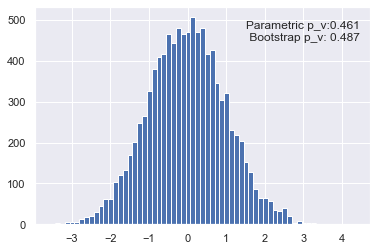

In [63]:
# Группа А1: 80-е квантили оптимальной и "скошенной" выборок
bootstrap_t_pvalue(b_a_1_80_opt, b_a_1_80_sk, plot=True)

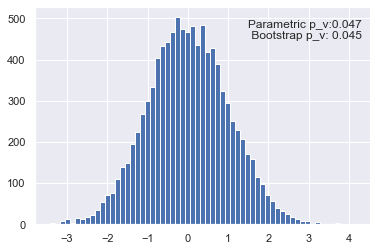

In [64]:
# Группа А2: 80-е квантили оптимальной и "скошенной" выборок
bootstrap_t_pvalue(b_a_2_80_opt, b_a_2_80_sk, plot=True)

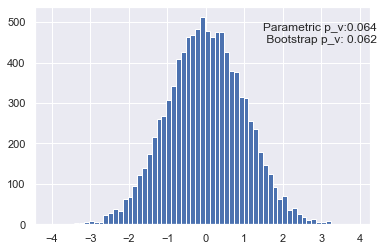

In [65]:
# Группа B: 80-е квантили оптимальной и "скошенной" выборок
bootstrap_t_pvalue(b_b_80_opt, b_b_80_sk, plot=True)

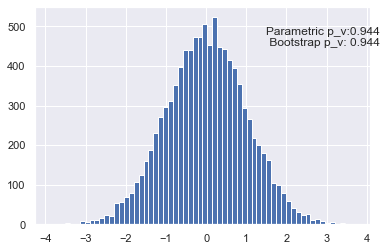

In [66]:
# Группы А1 и А2 B: 80-е квантили оптимальных выборок
bootstrap_t_pvalue(b_a_1_80_opt, b_a_2_80_opt, plot=True)

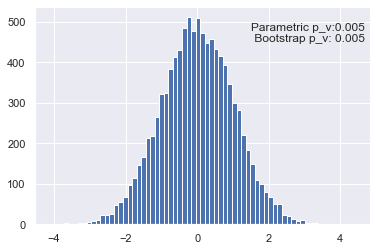

In [67]:
# Группы А1 и А2 B: 80-е квантили "скошенных" выборок
bootstrap_t_pvalue(b_a_1_80_sk, b_a_2_80_sk, plot=True)

### Наблюдения:
Наиболее значимые отличия в распределении значений 80 квантиля наблюдаются между "скошенными" выборками групп А1 и А2. <br>
P_value в районе 5% также наблюдается при сравнении значений 80 квантиля между оптимальной и "скошенной" выборками группы A2. 

